***I. The fully theoretical computation***

In [1]:
import handcalcs.render
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
import forallpeople as si
si.environment('custom')


In [2]:
uJ = (1e-6 * si.J)
MJ = 1e6*si.J
L = 1e-3*si.m**3
um = 1e-6*si.m
ug = 1e-9 * si.kg

Let's compute the theoretical energy necessary to grow one $\mu m$ of hypha. For this we need multiple values.

1. The energy contained in one mol of ATP can be found [here](https://bio.libretexts.org/Bookshelves/Introductory_and_General_Biology/Book%3A_General_Biology_(OpenStax)/2%3A_The_Cell/06%3A_Metabolism/6.4%3A_ATP%3A_Adenosine_Triphosphate) . It varies a lot depending on the physiological conditions. We can take the one for yeast : $e_{ATP} = 50kJ.mol^{-1}$
2. How long is the average protein. This number is discussed [here](http://book.bionumbers.org/how-big-is-the-average-protein/)
3. How many proteins there is per $fL$ of cell. This number can be found here [here](https://bionumbers.hms.harvard.edu/bionumber.aspx?s=n&v=4&id=115721)
4. How many ATP does it take to bind two amino acids. The answer is [here](https://bionumbers.hms.harvard.edu/bionumber.aspx?s=n&v=0&id=107782)

In [3]:
%%render

NA = 6.02*1e23 *si.mol**-1 #avogadro number

e_ATP= 50 * 1e3 *si.J * si.mol**-1 #energy per mol of ATP
L_prot = 400  #average length of proteins
n = 3e6*um**-3/NA  #average number of moles of proteins per unit volume
N_ATP_AA = 5 #number of ATP necessary to bind two amino acids
r_hypha = 5 *um #hypha radius
e_total_prot_synth = N_ATP_AA*e_ATP*L_prot*n*np.pi*r_hypha**2 #amount of energy necessary per unit length

<IPython.core.display.Latex object>

We can verify the number of protein per unit length using published data of protein to hyphal mass ratio from [here](https://academic.oup.com/femsle/article/254/2/258/524734)
We use the average weight of protein from [here](https://bionumbers.hms.harvard.edu/bionumber.aspx?id=108345&ver=0)

In [4]:
%%render
m_V_wet = 1100 *si.kg*si.m**-3
prot_weigth_ratio = 0.1
m_V_prot = prot_weigth_ratio*m_V_wet
m_prot = 46430 *1e-3*si.kg*si.mol**-1
n_data = m_V_prot/m_prot
ratio = n_data/n #the numbers are of similar orders of magnitude.

<IPython.core.display.Latex object>

Then let's compute the amount of carbon that need to be transferred too match this amount of energy. AMF store cabon predominantly in the form of lipids according to [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5559270/). These lipids are either in the form or triglycerol (TAG) or in the form of fatty acids. The main fatty acids in AMF have between 16 and 20 carbons see [here](https://doi.org/10.1017/S0953756299001410). The majority is palmitic acid according to [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5559270/) whose formula is $C_{16}H_{32}O_{2}$. Lipids being lipid or palmitic acid (or longer chain fatty acids) will only slightly change the calculation. We will therefore continue with palmitic acid for which most data is available. 

Then to compute the amount of lipid necessary to provide this amount of energy we need to first know how much energy a typical lipid molecule can release. To do that

1. We find [here](https://www.abcam.com/pathways/fatty-acid-oxidation) that palmitic acid oxydation can generate 129 ATP  
2. We find the density of palmitic acid

In [5]:
%%render
M_lipid = (16*12+32+2*16)*1e-3*si.kg*si.mol**-1 #molar mass of palmitic acid
d_palmitic = 850*si.kg*si.m**-3 #density of palmitic acid
N_ATP_palmitic = 129 #number of palmitic acid molecules that can be produced 
e_palmitic_ATPbased = N_ATP_palmitic/NA*e_ATP*NA/(M_lipid)*d_palmitic
e_palmitic_ATPbased #amount of energy per unit volume of palmitic acid

<IPython.core.display.Latex object>

<!-- B)
1. We get an estimate of energy contained in a gram of palmitic acid. For this we can use values for refined palm oil which is mainly composed of palmitic acid (hence the name). We find [here](http://www.palmoilindonesia.com/indonesia-palm-oil/nutrition-and-calories/) 884cal/100g.
2. The density of palmitic acid, easy to find on the internet.
3. The efficiency of transformation from Fatty acid to ATP. This can be found [here](http://book.bionumbers.org/how-much-energy-is-released-in-atp-hydrolysis/) . -->

In [6]:
# %%render
# d_palmitic= 850 *si.kg*si.m**-3 #the density of palmitic acid
# e_palmitic_total = 884*4.18/100* si.J*1e-3*si.kg**-1 #the energy density of lipid lipids
# e_palmitic_total_v= e_palmitic_total*d_palmitic
# efficency = 0.4 #efficiency of transformation from lipid to ATP molecules 
# e_palmitic_palmoilbased = efficency*e_palmitic_total_v


<!-- The two estimates don't yield the same result -->

In [7]:
%%render

# e_palmitic_palmoilbased
e_palmitic_ATPbased

<IPython.core.display.Latex object>

We finally fin the volume of lipid necessary per unit lenght of hyphal growth

In [8]:
%%render

V_lipid_energy_theory=e_total_prot_synth/(e_palmitic_ATPbased)

<IPython.core.display.Latex object>

In reality, the carbon brought in the lipid is both the energy used for protein synthesis and the carbon building block of the newly built biomass. It it therefore expected that the theoretical value is higher. How much C is there in the fungal biomass and to what amount of lipids does this correspond to? 

Palmitic acid formula is $C_{16}H_{32}O_{2}$ the proportion of the mass that is due to carbon is

In [9]:
%%render
ratio_lipid_C = 16*12/(16*12+32+2*16)

<IPython.core.display.Latex object>

How much carbon in one meter of hypha in theory. To estimate this, one needs to get three values. The two first ones are the buoyant density $d_{biomass}$ and the dry mass to wet mass ratio $r_{d/w}$. One can find values for this in the literrature [here](https://journals.asm.org/doi/epdf/10.1128/aem.45.4.1188-1195.1983) . For fungi they find $d_{biomass} =1.1$ and $r_{d/w}=0.2$. In our case, since AMF are lipid rich we could imagine this ratio being higher (lipids fill some water volume therefore increasing $r_{d/w}$). This alreay yields an estimate of what the dry biomass in the fungal compartment should be.

In [10]:
%%render
L_colony = 1*si.m
V_total = L_colony*pi*r_hypha**2

d_biomass = 1100 *si.kg*si.m**-3
m_wet = V_total * d_biomass
r_dw=0.2
m_dry = m_wet*r_dw

<IPython.core.display.Latex object>

We need to know another factor $r_{C/Tot}$ which is the ratio of the dry mass that is carbon. We find values for this [here](https://www.frontiersin.org/articles/10.3389/fmicb.2017.01281/full), it varies between fungal species but we can take $r_{C/Tot}=0.4$

In [11]:
%%render

r_CTot = 0.4
m_C = m_dry * r_CTot
m_C

<IPython.core.display.Latex object>

Through this path, we can get an estimate of the carbon required for the growth per unit length hypha for biomass material. We use [the density of palmitic acid](https://en.wikipedia.org/wiki/Palmitic_acid)

In [12]:
%%render
m_L_C = pi*r_hypha**2*d_biomass*r_dw*r_CTot #the mass of carbon necesarry per unit length
V_lipid_biomass_theory = m_L_C/(d_palmitic*ratio_lipid_C) #the volume of lipid necessary per unit length, assuming all mass of lipid is carbon

<IPython.core.display.Latex object>

We can then compute the total amount of lipid necessary for growth.

In [13]:
%%render

V_lipid_theory= V_lipid_energy_theory + V_lipid_biomass_theory

<IPython.core.display.Latex object>

We can then compute the theroetical CUE at the hypha growth level

In [14]:
%%render
CUE = V_lipid_biomass_theory/V_lipid_theory

<IPython.core.display.Latex object>

One must take this CUE very carefully, all of this calculation are bad on a large number of assumptions. This is merely a good way to check that our order of magnitude are not completely off since the two estimates are the end result of quite different calculation. The fact that the CUE we find is not entirely absurd (although it's higher than the 0.5-0.6 at the organism level you would expect according to [here](https://www.nature.com/articles/s41467-019-11488-z)) give confidence that the computations are not too wrong.

The volume of lipid necessary to grow one $\mu m$ of hypha is informative but it is dependent on the radius of the hypha. To get rid ot this dependence, we can divide the value by the cross sectional area. This can be seen as a volume efficiency $e_{volume}$ : how much volume of biomass is being produced per unit lipid brought.

In [15]:
%%render

e_volume_theory = (pi*r_hypha**2)/V_lipid_theory

<IPython.core.display.Latex object>

We can further check this estimates comparing our estimates to actual growth observed from single spores

***II. The spore loading method***

We first estimate the volume of lipids contained in a spore.

In [16]:
%%render

d_spore = 78*um #spore diameter
d_spore
spore_volume = (d_spore/2)**3*4/3*pi
rho_lipid_spore = 0.1 #the percentage of volume occupied by lipids
V_lipid = spore_volume*rho_lipid_spore


<IPython.core.display.Latex object>

There is an alternative way of estimating this volume. The table 3 [here](https://doi.org/10.1017/S0953756299001410) indicates that 20% of the biomass spore of G. intraradices can be lipids. We use the same approach as before. However is really 10% of the volume is lipid, we need to adapt the $r_{d/w}$ parameter.

In [17]:
%%render
m_wet = spore_volume * d_biomass
r_dw=0.3
m_dry = m_wet*r_dw
lipid_prop = 0.2
m_lipid_data = m_dry*lipid_prop
V_lipid_data = m_lipid_data / d_palmitic

<IPython.core.display.Latex object>

The two values yield results of similar order of magnitude, this gives confidence in the first calculation

Assuming the ratio of lipid in the spore is constant, the reachable length of the germinating spore $L_{germ}$should be a cubic function of spore diameter. $L_{germ} = a.d_{spore}**3$ with coefficien $a = \rho_{lipid} / V_{lipid}$ where $\rho_{lipid}$ is the propotion of spore volume filled with lipids and $V_{lipid}$ is the volume of lipid necessary per unit length of growth.

Let's see if we see such a relationship in Vasilis data with spores

In [18]:
data = pd.read_excel("vasilis_data.xlsx",sheet_name="Experiment 1")
data = data.loc[data['THL']<=30000]
data = data.loc[data['SD']<=150]
data = data.sort_values(by="SD")

data_dik = data.loc[data['Karyosis']=='Dikaryon'].copy()
data_hom = data.loc[data['Karyosis']=='Homokaryon'].copy()
rolling = 20
for sub_data in [data_hom,data_dik,data]:
    sub_data['THL_mean']=sub_data["THL"].rolling(rolling).mean()
    sub_data['THL_sup']=sub_data["THL"].rolling(rolling,center=True).quantile(0.9)
    sub_data['rolling average total_growth (um)']=sub_data['THL_mean']
    sub_data['rolling sup total_growth (um)']=sub_data['THL_sup']
    sub_data['logTHL']=np.log(sub_data["THL"])
    sub_data['logTHL_mean']=sub_data["logTHL"].rolling(rolling).mean()
    sub_data['logTHL_sup']=sub_data["logTHL"].rolling(rolling).quantile(0.9)

We do a rolling 90th percentile to really get the data corresponding to maximum growth of spores : spore going to their full potential of growth

Text(0, 0.5, 'Total hyphal length ($\\mu m$)')

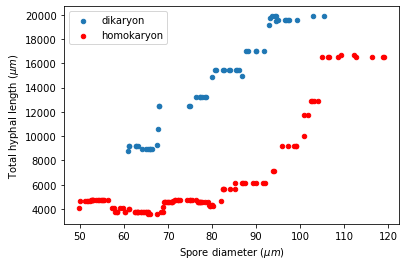

In [19]:
fig, ax = plt.subplots()
data_dik.plot('SD','THL_sup',kind="scatter",ax=ax,label="dikaryon")
data_hom.plot('SD','THL_sup',kind="scatter",ax=ax,color='red',label="homokaryon")
ax.set_xlabel('Spore diameter ($\mu m$)')
ax.set_ylabel('Total hyphal length ($\mu m$)')

Bigger spores indeed create longer hyphae. The plateauing at the end is an artefact of the rolling statistics and should be ignored.

We can get a finer estimates of the $a$ coefficient by doint a curve fit assuming the cubic dependence

In [20]:
from scipy.optimize import curve_fit
def cubic(x,a):
    return(a*x**3)

We can then fit a cubic function to the data to find its coefficient.

In [21]:
data_select = data_dik.loc[~data_dik['THL_sup'].isnull()]
popt,cov = curve_fit(cubic, data_select['SD'],data_select['THL_sup'],bounds = ([0],[np.inf]),p0=[1])

Text(0, 0.5, 'Total hyphal length ($\\mu m$)')

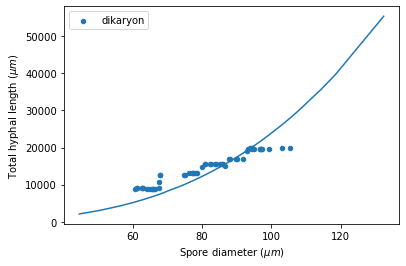

In [22]:
fig, ax = plt.subplots()
data_dik.plot('SD','THL_sup',kind="scatter",ax=ax,label="dikaryon")
ax.plot(data_dik['SD'],popt[0]*data_dik['SD']**3)
ax.set_xlabel('Spore diameter ($\mu m$)')
ax.set_ylabel('Total hyphal length ($\mu m$)')

We can then estimate a data based estimate of $V_{lipid}$

In [23]:
%%render
a_data = popt[0] * um**-2
V_lipid = rho_lipid_spore/a_data

<IPython.core.display.Latex object>

We can compare the volume of lipid necessary per unit length of hypha for protein synthesis

Then total lipid necessary per $\mu m$ of hyphal growth is then 

We can compare this to the experimental value obtained from spore data, as a reminder

In [24]:
%%render
rho_lipid_spore = 0.1
V_lipid_experiment = 4/3*pi*rho_lipid_spore/a_data
V_lipid_experiment

<IPython.core.display.Latex object>

Germ tubes are however thinner than the typical hyphae, for full comparison its better to compar volume efficiencies.

In [34]:
%%render
r_germtube = 2e-6 *si.m
e_volume_data = (pi*r_germtube**2)/V_lipid_theory
e_volume_theory

<IPython.core.display.Latex object>

Again, the orders of magnitude match. Our estimates of the lipid volume necessary for growth is robust.

For the rest we'll use the average of those two estimates 

In [43]:
%%render

e_volume = (e_volume_theory+e_volume_data)/2
e_volume = e_volume_data

<IPython.core.display.Latex object>

What does this mean in terms of transport? We know that individual hyphae can grow at a speed of $300\mu m.h^{-1}$

In [44]:
%%render
v_hypha_growth = 30000/3600 * si.mum_s
r_hypha = 2 *um #hypha radius
Phi_lipid_required =  pi * r_hypha**2*v_hypha_growth/e_volume

<IPython.core.display.Latex object>

How fast do lipid need to travel to match this flux? To estimate this we need to know the ratio of hyphal cross section filled with lipids. From [here](https://academic.oup.com/plphys/article/128/1/108/6110058?searchresult=1) we get a value of 20% for R. irregularis.

In [46]:
%%render
r_hypha_trunk = 5*um
rho_lipid = 0.2 #ratio of hyphal volume filled with lipids see 
v_lipid = Phi_lipid_required/(rho_lipid*pi * r_hypha_trunk**2)

<IPython.core.display.Latex object>

This is much smaller than the value we observe for transport speed. However this is when only one hypha is growing in parallel. There are typicall tens of hyphae growing from one hypha in parallel. All the lipid fueling this growth has to pass through a trunk hypha that connect to the root. In our experiment we see total colony growth speed being $100\times$ the single hypha growth speed. However a lot of the contribution to this growth speed in length is from finer hyphae. There are also potentially multiple trunk hyphae connecting to the root compartment. If we take $N =20$ hyphae that depend on a trunk hypha we get

In [29]:
%%render
N_hyphae = 20
v_lipid_tot = v_lipid * N_hyphae

<IPython.core.display.Latex object>

We approach the order of magnitude of transport speed observed in the network